In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Boston.csv')

In [ ]:
df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 15)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('medv',axis=1)

In [ ]:
print(X)
#scaling
from sklearn.preprocessing import StandardScaler

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  
0   

In [ ]:
sc=StandardScaler()
scaled_X=sc.fit_transform(X)
print(scaled_X)

[[-1.72863116 -0.41978194  0.28482986 ... -1.45900038  0.44105193
  -1.0755623 ]
 [-1.72178509 -0.41733926 -0.48772236 ... -0.30309415  0.44105193
  -0.49243937]
 [-1.71493903 -0.41734159 -0.48772236 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [ 1.71493903 -0.41344658 -0.48772236 ...  1.17646583  0.44105193
  -0.98304761]
 [ 1.72178509 -0.40776407 -0.48772236 ...  1.17646583  0.4032249
  -0.86530163]
 [ 1.72863116 -0.41500016 -0.48772236 ...  1.17646583  0.44105193
  -0.66905833]]


In [ ]:
Y=df['medv']

In [ ]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-0.22249708, -0.37884533, -0.48772236, ..., -0.48803915,
         0.38403727, -0.41254031],
       [-1.24256061, -0.402042  , -0.48772236, ...,  0.34421334,
         0.22220334, -0.38871077],
       [-0.0855758 , -0.40733349,  0.79986468, ..., -0.85792914,
         0.37910331, -0.17845009],
       ...,
       [-0.92764167, -0.40294739, -0.48772236, ..., -0.30309415,
         0.41484712, -0.32983778],
       [-1.40686615, -0.39383653, -0.48772236, ..., -0.2568579 ,
         0.3954402 ,  0.86163938],
       [-0.55110815, -0.40432525, -0.48772236, ..., -0.85792914,
         0.44105193,  0.28552513]])

In [ ]:
Y_train


220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: medv, Length: 404, dtype: float64

In [ ]:
Y_train.shape

(404,)

In [ ]:
X_train.shape

(404, 14)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [ ]:
lr=LinearRegression()

In [ ]:
# train the model
model_lr=lr.fit(X_train,Y_train)

In [ ]:
#Prediction
y_pred_train_lr=lr.predict(X_train)
y_pred_test_lr=lr.predict(X_test)
from sklearn.metrics import r2_score
# Accuracy score
print("Training accuracy : {} \n".format(r2_score(Y_train,y_pred_train_lr).round(5)))
print("Testing accuracy : {} \n".format(r2_score(Y_test,y_pred_test_lr).round(5)))

Training accuracy : 0.7733 

Testing accuracy : 0.59146 



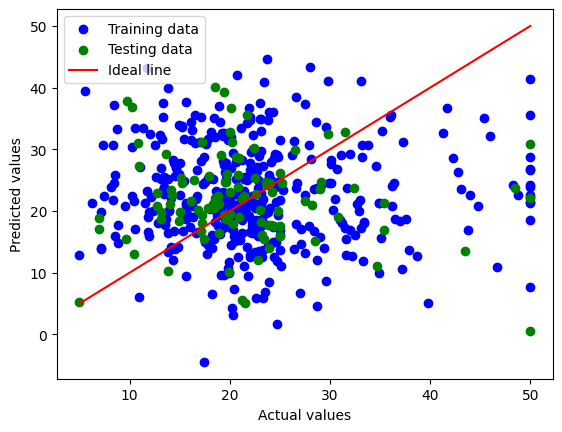

In [ ]:
# Plotting the line LINEAR REGRESSION
plt.scatter(Y_train, y_pred_train_lr, color='blue', label='Training data')
plt.scatter(Y_test, y_pred_test_lr, color='green', label='Testing data')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [ ]:
ridge1=Ridge()
# fit the model
model_ridge1=ridge1.fit(X_train,Y_train)
# Prediction
y_pred_train_ridge1 = ridge1.predict(X_train)
y_pred_test_ridge1 = ridge1.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_ridge1).round(5)))
print('Testing accuracy : {}'.format(r2_score(Y_test, y_pred_test_ridge1).round(5)))

Training accuracy : 0.75017

Testing accuracy : 0.66327


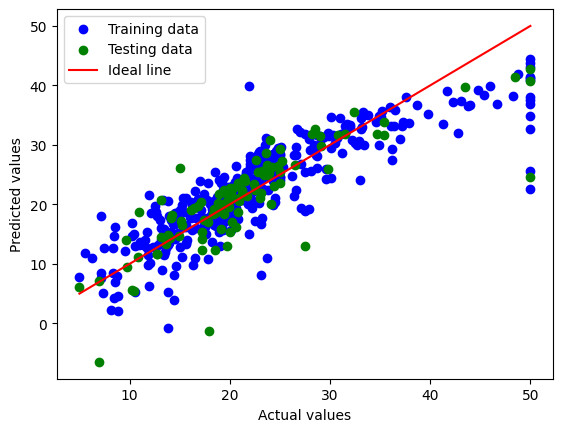

In [ ]:
# Plotting the line RIDGE
plt.scatter(Y_train, y_pred_train_ridge1, color='blue', label='Training data')
plt.scatter(Y_test, y_pred_test_ridge1, color='green', label='Testing data')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


In [ ]:
enet1 = ElasticNet()
# Fit the model
model_enet1 = enet1.fit(X_train, Y_train)

# Prediction
y_pred_train_enet1 = enet1.predict(X_train)
y_pred_test_enet1 = enet1.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_enet1).round(5)))
print('Testing accuracy : {}'.format(r2_score(Y_test, y_pred_test_enet1).round(5)))

Training accuracy : 0.69187

Testing accuracy : 0.47288


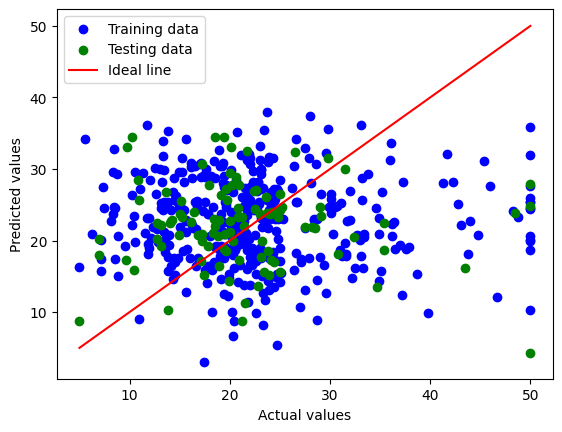

In [ ]:
# Plotting the line ELASTIC NET
plt.scatter(Y_train, y_pred_train_enet1, color='blue', label='Training data')
plt.scatter(Y_test, y_pred_test_enet1, color='green', label='Testing data')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [ ]:
lasso1 = Lasso()

# Fit the model
model_lasso1 = lasso1.fit(X_train, Y_train)

# Prediction
y_pred_train_lasso1 = lasso1.predict(X_train)
y_pred_test_lasso1 = lasso1.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_lasso1)))
print('Testing accuracy : {}'.format(r2_score(Y_test, y_pred_test_lasso1)))

Training accuracy : 0.6965127939372784

Testing accuracy : 0.6673004117220729


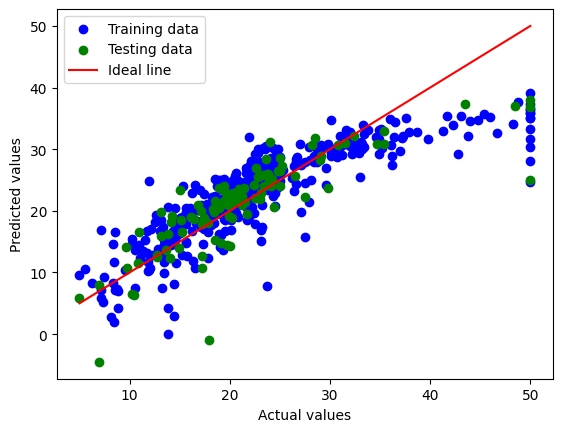

In [ ]:
# Plotting the line LASSO
plt.scatter(Y_train, y_pred_train_lasso1, color='blue', label='Training data')
plt.scatter(Y_test, y_pred_test_lasso1, color='green', label='Testing data')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


Training accuracy: 0.69651
Testing accuracy: 0.6673


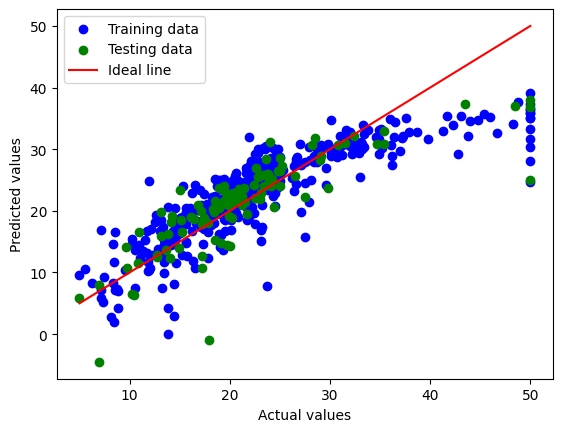

In [ ]:
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the Boston dataset
df1=pd.read_csv('/content/Boston.csv')
X1=df1.drop('medv',axis=1)
Y1=df1['medv']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

lasso1 = Lasso()

# Fit the model
model_lasso1 = lasso1.fit(X_train, Y_train)

# Predictions
y_pred_train_lasso1 = lasso1.predict(X_train)
y_pred_test_lasso1 = lasso1.predict(X_test)

# Accuracy scores
training_accuracy = r2_score(Y_train, y_pred_train_lasso1)
testing_accuracy = r2_score(Y_test, y_pred_test_lasso1)

print("Training accuracy: {}".format(training_accuracy.round(5)))
print("Testing accuracy: {}".format(testing_accuracy.round(5)))

# Plotting the line
plt.scatter(Y_train, y_pred_train_lasso1, color='blue', label='Training data')
plt.scatter(Y_test, y_pred_test_lasso1, color='green', label='Testing data')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()
